### Libraries

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Utils

In [0]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#0000FF', '#000000', '#FF0000', '#66FF66','#FFFF66', '#9999FF', '#660033', '#FF6666', '#C0C0C0']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('Dataset PCA (n_components = 2)')

    plt.show()

## The simple autoencoder

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 -> compression of factor 24.5, assuming the input is 784

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### Encoder model

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

### Decoder model

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Load mnist data 

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Train the model

In [0]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 2s 35us/step - loss: 0.3587 - val_loss: 0.2701
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2621 - val_loss: 0.2497
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2373 - val_loss: 0.2235
Epoch 4/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2158 - val_loss: 0.2058
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2013 - val_loss: 0.1940
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1910 - val_loss: 0.1851
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1831 - val_loss: 0.1780
Epoch 8/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1763 - val_loss: 0.1717
Epoch 9/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1705 - val_loss: 0.16

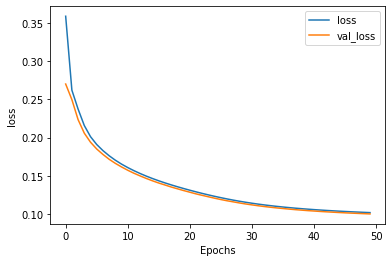

In [0]:
%matplotlib inline

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "loss")

### Test the encoder and decoder model

In [0]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

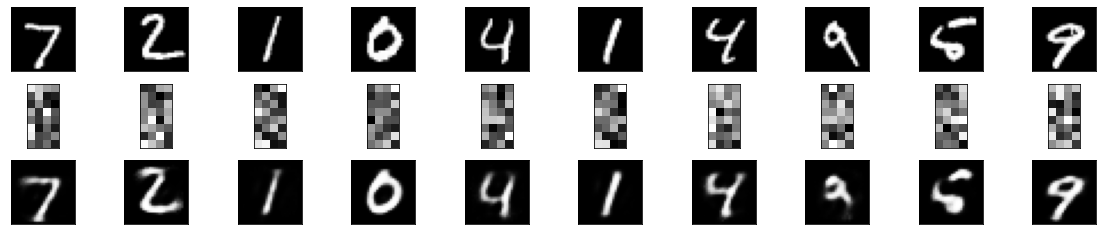

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Plot 2-D diagram by PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(encoded_imgs)

X_pca = pca.transform(encoded_imgs)

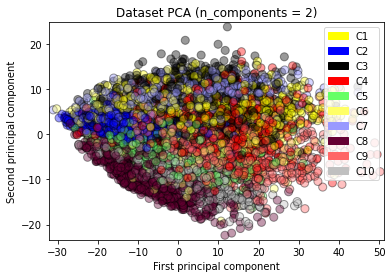

In [0]:
plot_labelled_scatter(X_pca, y_test, ['C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10'])

## Deep autoencoder

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
encoder = Model(input_img, encoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 784)               1011

In [0]:
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.3404 - val_loss: 0.2630
Epoch 2/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2582 - val_loss: 0.2545
Epoch 3/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2477 - val_loss: 0.2395
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2304 - val_loss: 0.2209
Epoch 5/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2149 - val_loss: 0.2075
Epoch 6/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2026 - val_loss: 0.1954
Epoch 7/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1885 - val_loss: 0.1825
Epoch 8/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1803 - val_loss: 0.1778
Epoch 9/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1750 - val_loss: 0.1

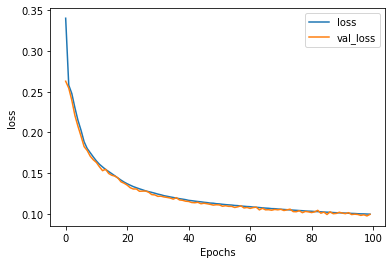

In [0]:
plot_graphs(history, "loss")

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

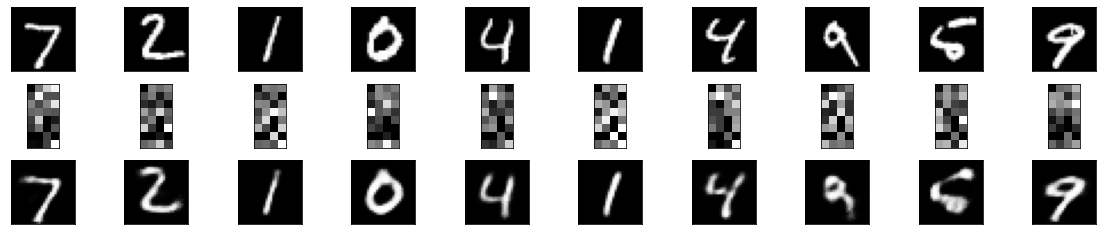

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Plot 2-D diagram by PCA

In [0]:
pca = PCA(n_components = 10).fit(encoded_imgs)
X_pca = pca.transform(encoded_imgs)

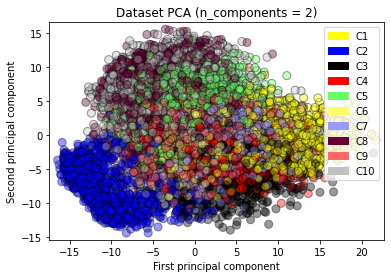

In [0]:
plot_labelled_scatter(X_pca, y_test, ['C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10'])

### Plot 2-D diagram by t-SNE

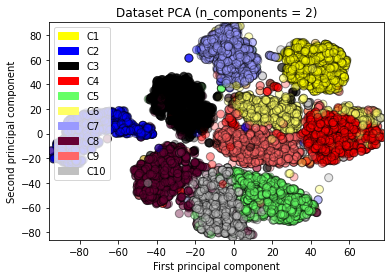

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)
X_tsne = tsne.fit_transform(encoded_imgs)
plot_labelled_scatter(X_tsne, y_test, ['C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10'])

## Convolutional autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.2082 - val_loss: 0.1609
Epoch 2/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.1533 - val_loss: 0.1449
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.1405 - val_loss: 0.1332
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.1327 - val_loss: 0.1286
Epoch 5/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1283 - val_loss: 0.1273
Epoch 6/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1247 - val_loss: 0.1217
Epoch 7/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.1218 - val_loss: 0.1242
Epoch 8/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.1198 - val_loss: 0.1201
Epoch 9/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1179 - val_loss: 0.1126
Epoch

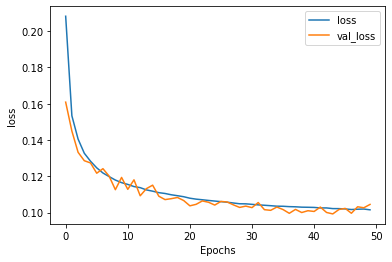

In [0]:
plot_graphs(history, "loss")

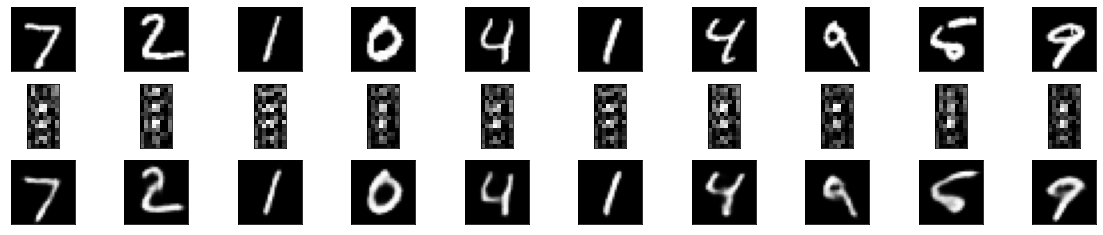

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

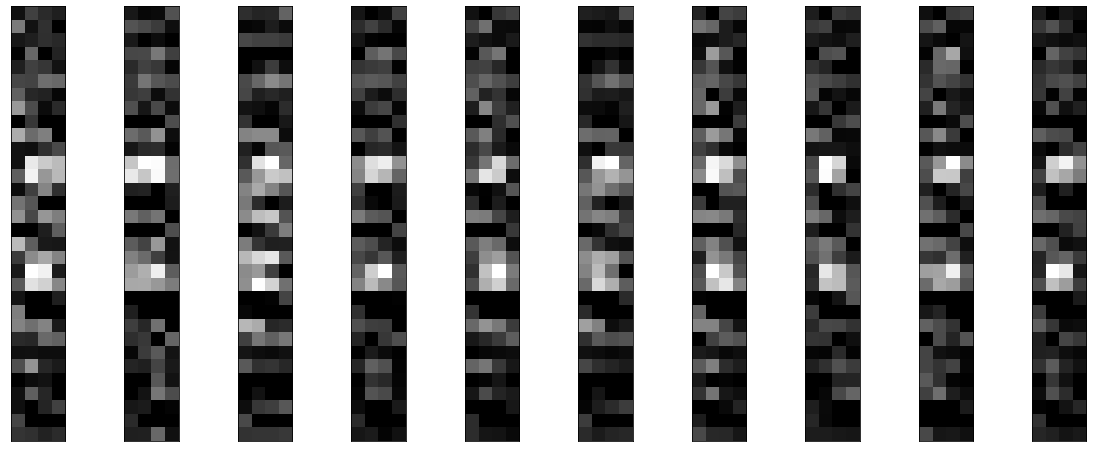

In [0]:
# Another type of encoded images
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Reference:
https://blog.keras.io/building-autoencoders-in-keras.html